<a href="https://colab.research.google.com/github/sam0786-xyz/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score
import scipy.stats as stats

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df['target'] = cancer['target']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


<Axes: xlabel='mean radius', ylabel='mean texture'>

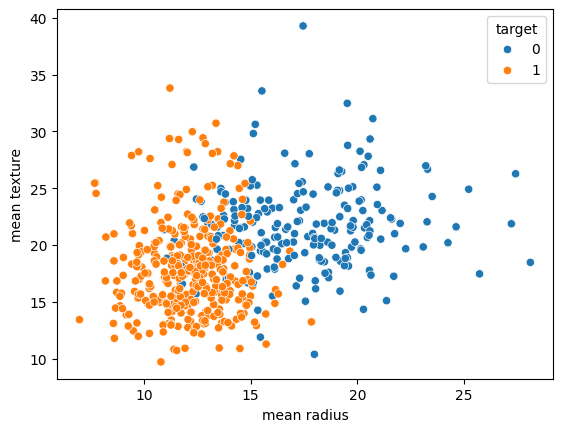

In [ ]:
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='target')

In [ ]:
def handle_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for col in columns:
        #IQR Method
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        #zscore
        z_score = np.abs(stats.zscore(df_clean[col]))
        #Mask(combing both methods)
        iqr_mask = (df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)
        zscore_mask = z_score <= n_std
        mask = iqr_mask & zscore_mask
        median_value = df[col].median()
        df_clean.loc[~mask, col] = median_value

        print(f"Replaced {(~mask).sum()} outliers in {col}")

    return df_clean

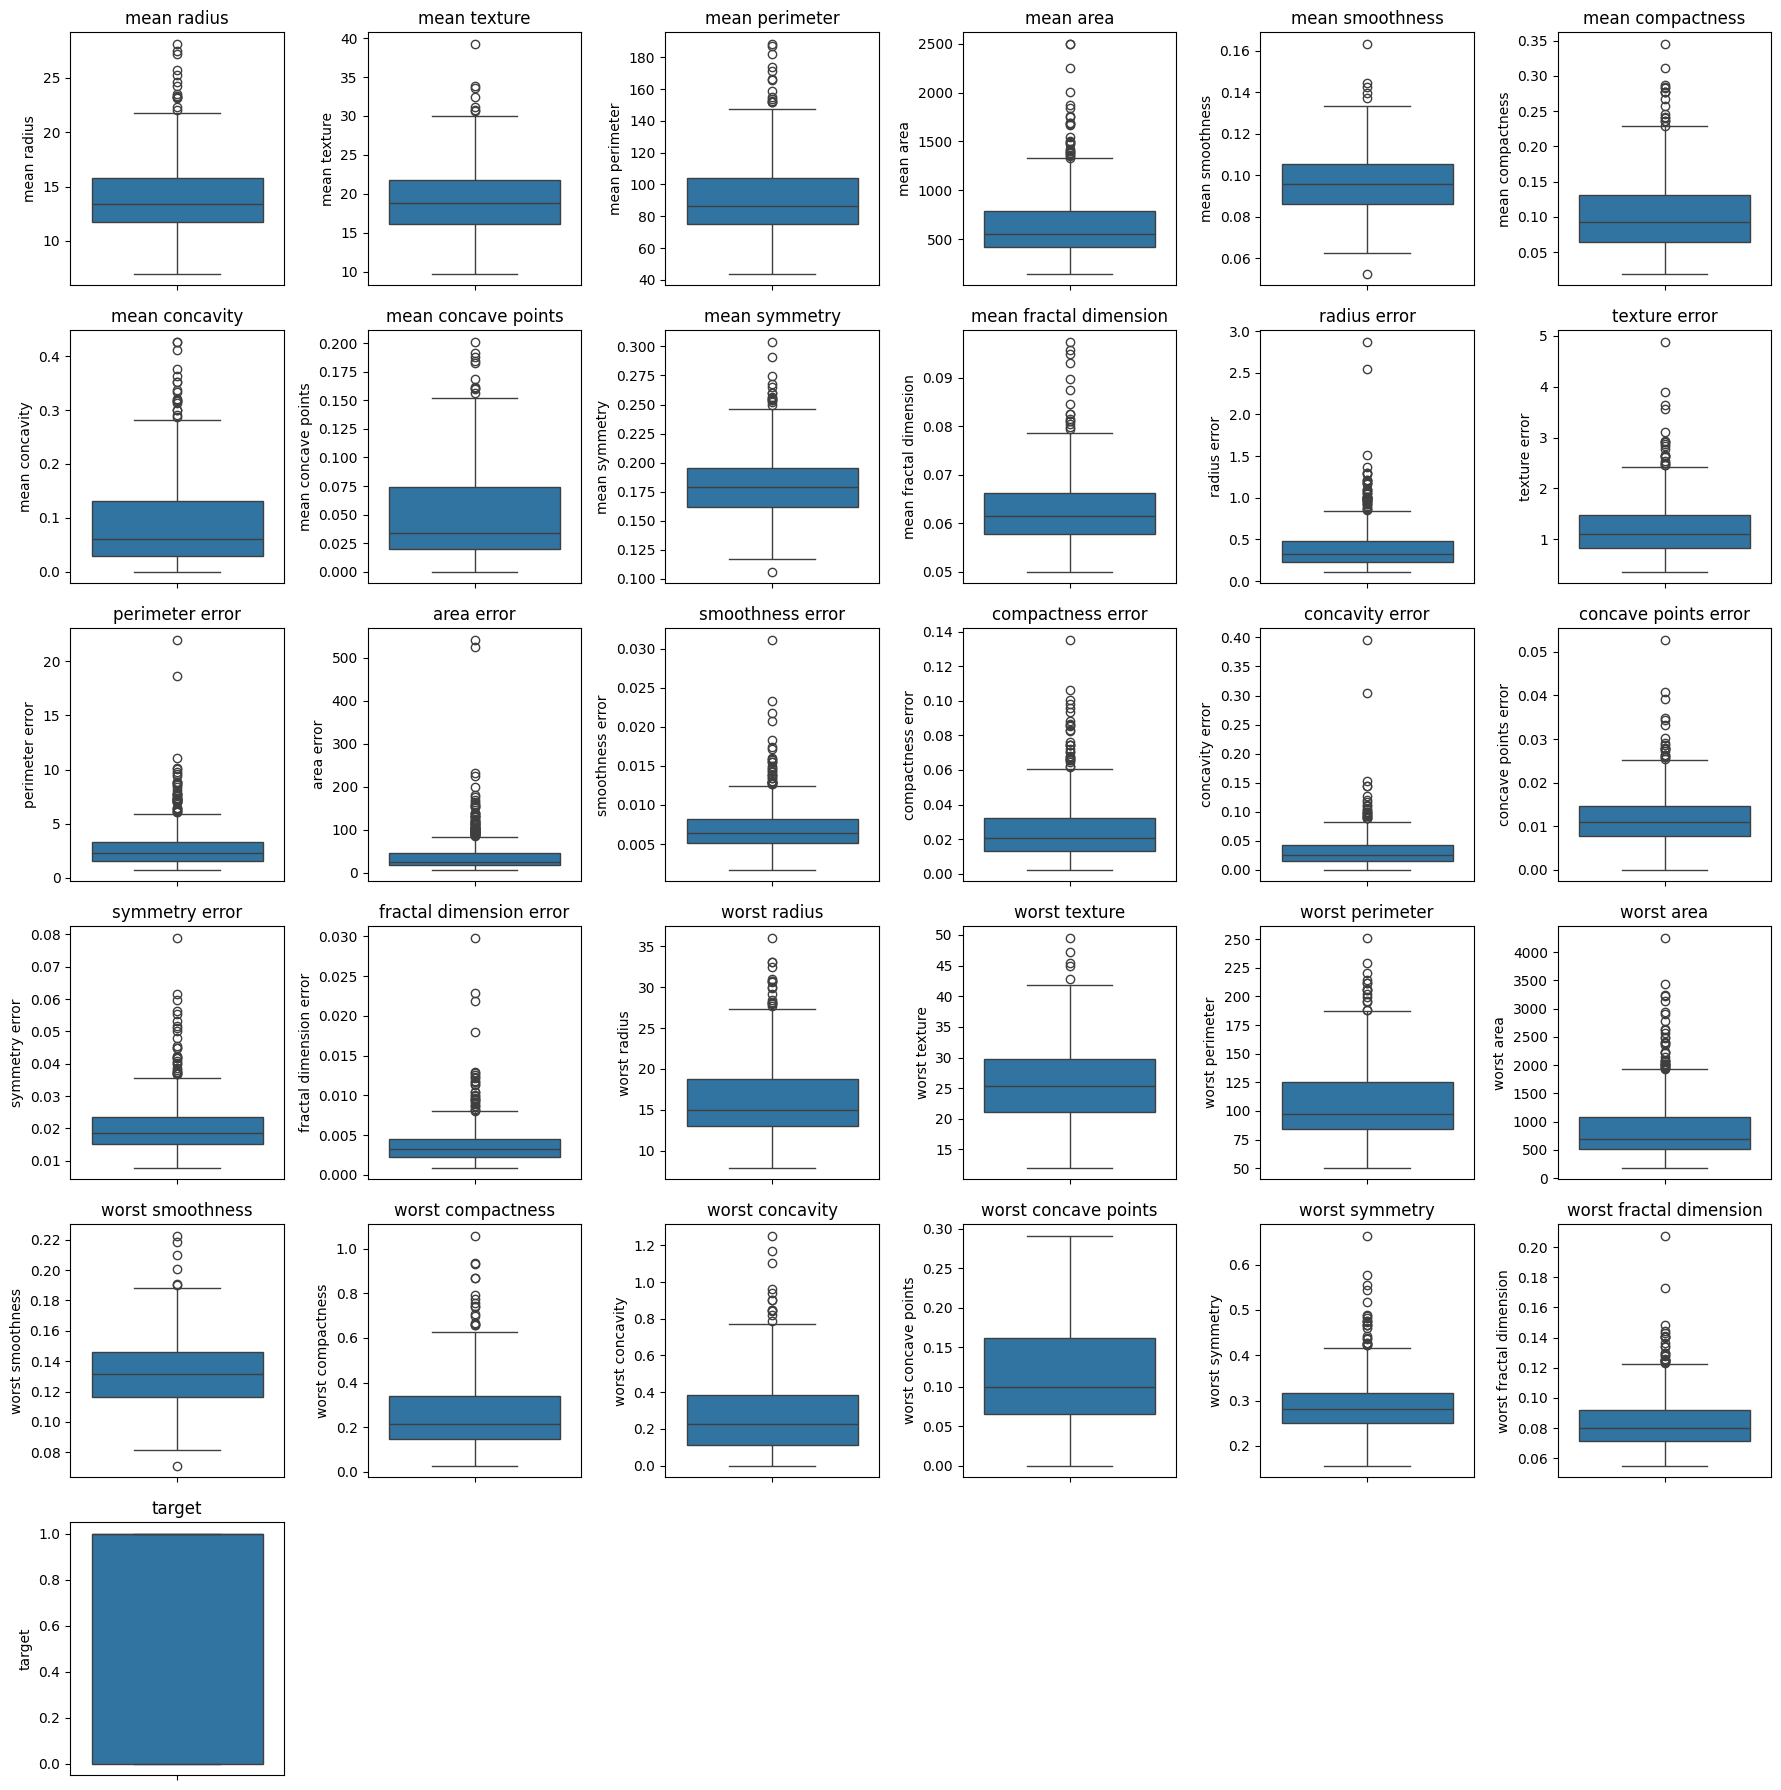

In [ ]:
plt.figure(figsize=(18, 18))
for i, column in enumerate(df.columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(data=df, y=column)  # Corrected syntax for boxplot
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
outliers_col = df.columns[:-1]
df_clean = handle_outliers(df, outliers_col, n_std = 3)

Replaced 14 outliers in mean radius
Replaced 7 outliers in mean texture
Replaced 13 outliers in mean perimeter
Replaced 25 outliers in mean area
Replaced 6 outliers in mean smoothness
Replaced 16 outliers in mean compactness
Replaced 18 outliers in mean concavity
Replaced 10 outliers in mean concave points
Replaced 15 outliers in mean symmetry
Replaced 15 outliers in mean fractal dimension
Replaced 38 outliers in radius error
Replaced 20 outliers in texture error
Replaced 38 outliers in perimeter error
Replaced 65 outliers in area error
Replaced 30 outliers in smoothness error
Replaced 28 outliers in compactness error
Replaced 22 outliers in concavity error
Replaced 19 outliers in concave points error
Replaced 27 outliers in symmetry error
Replaced 28 outliers in fractal dimension error
Replaced 17 outliers in worst radius
Replaced 5 outliers in worst texture
Replaced 15 outliers in worst perimeter
Replaced 35 outliers in worst area
Replaced 7 outliers in worst smoothness
Replaced 16 o

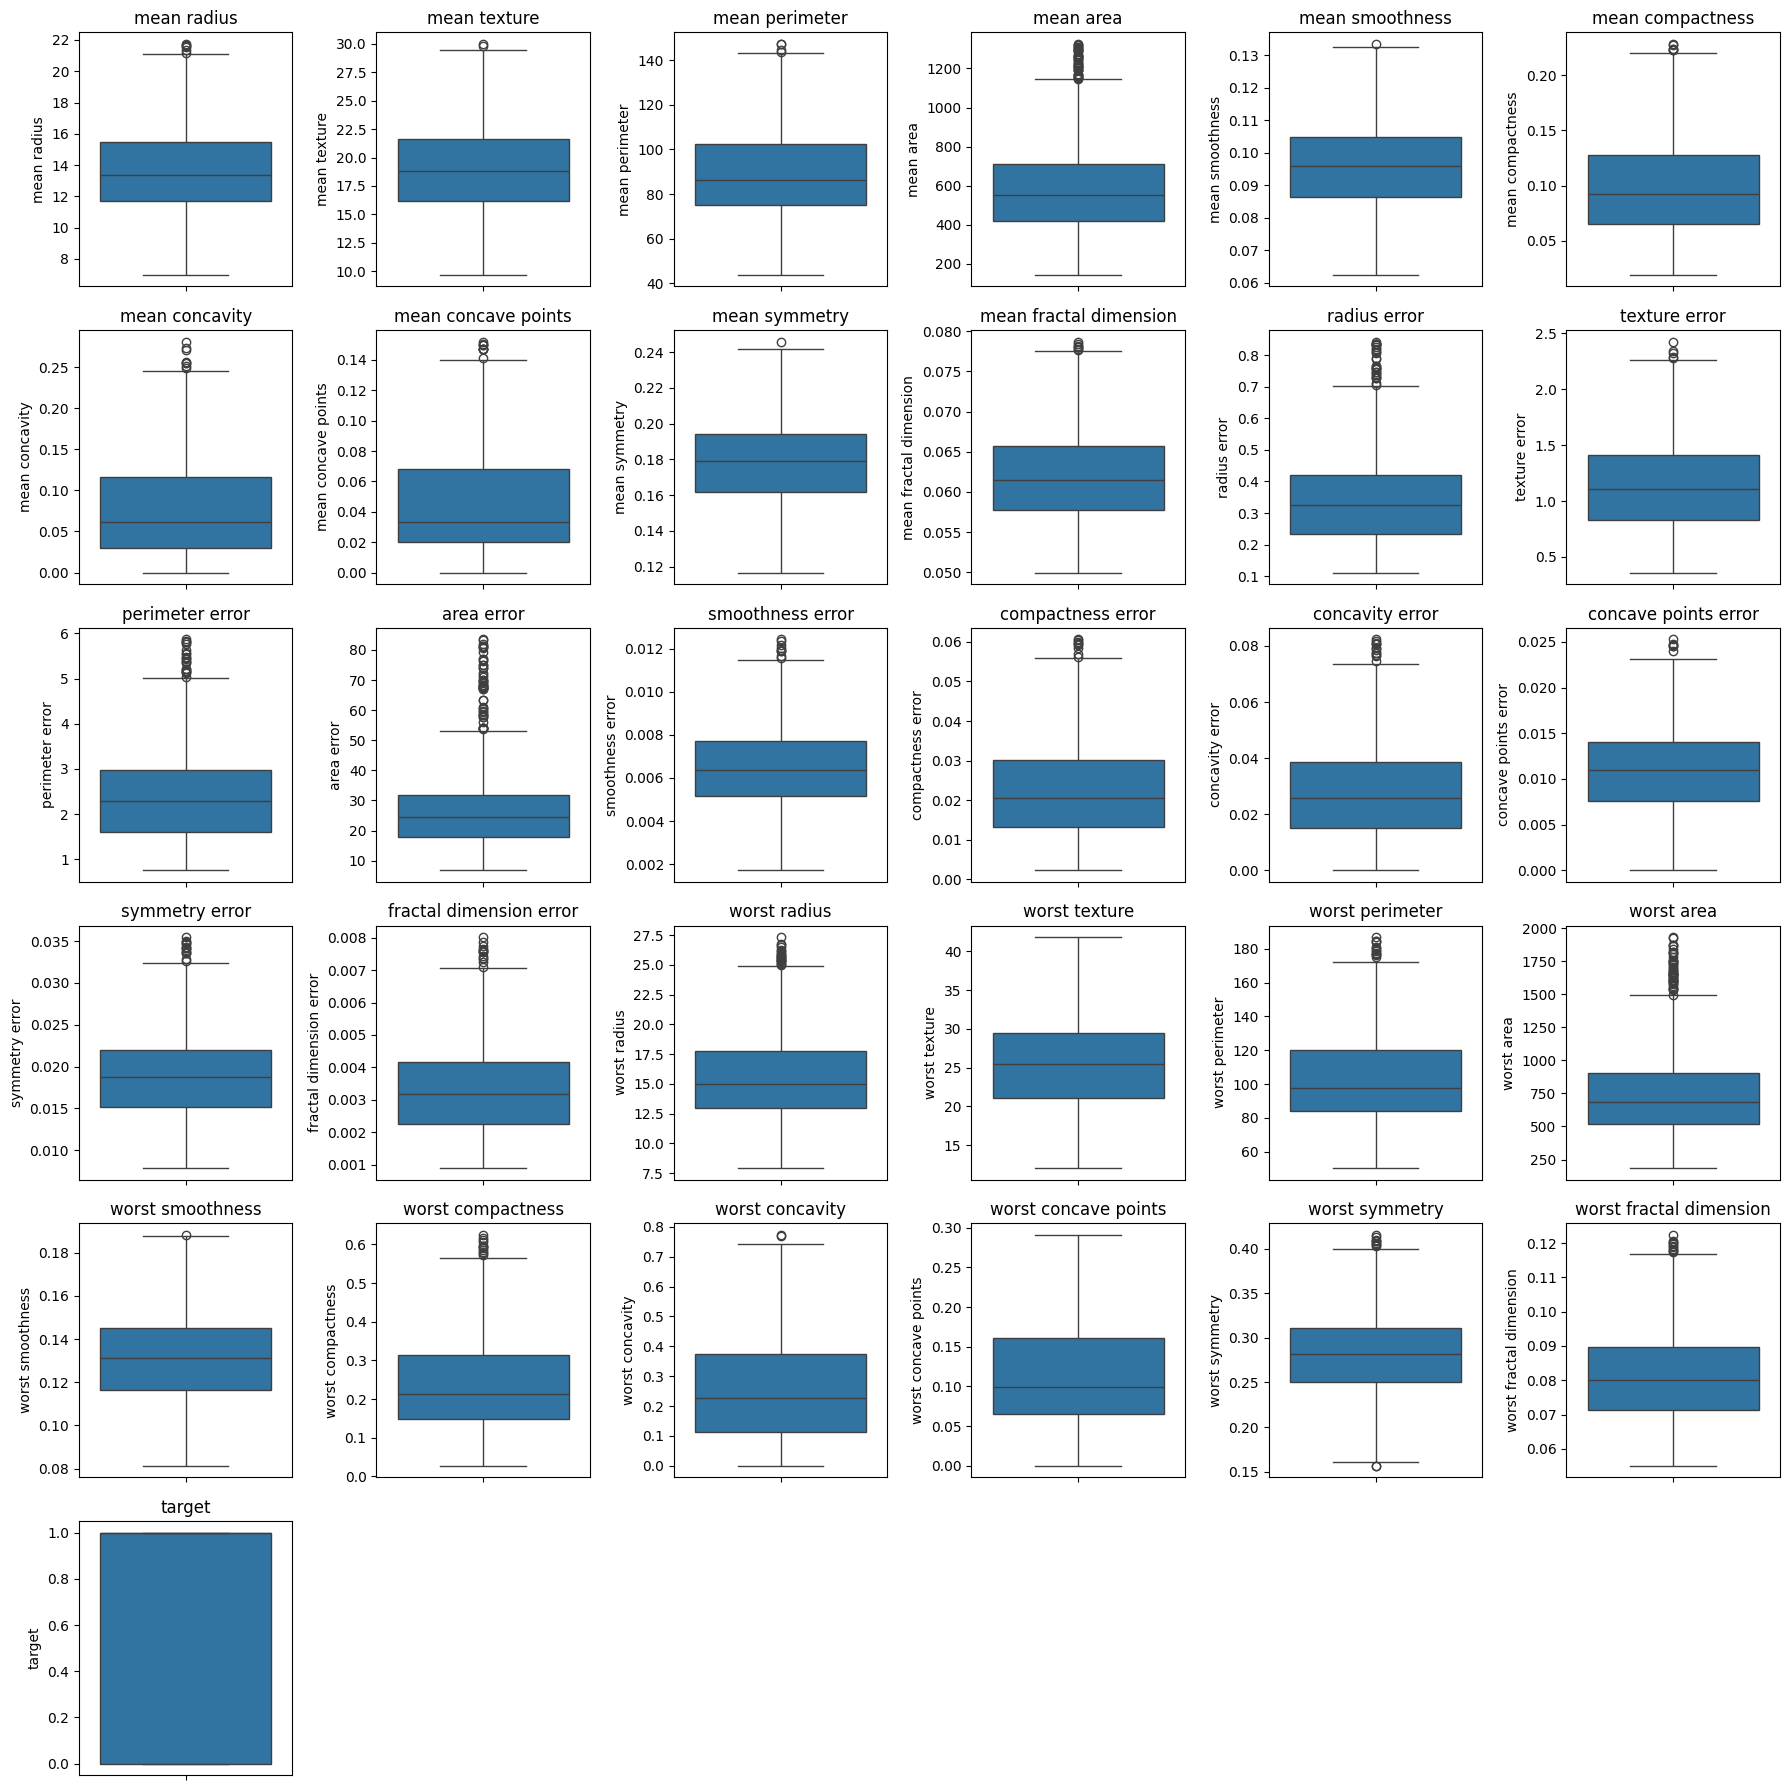

In [ ]:
plt.figure(figsize=(18, 18))
for i, column in enumerate(df_clean.columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(df_clean[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_clean.to_csv('/content/drive/My Drive/cleaned_cancer_data.csv', index=False)

In [ ]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Then fit the scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform test data using the scaler fit on training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accu=accuracy_score(y_test,y_pred)
accu

0.9824561403508771

In [ ]:
precision =  precision_score(y_test, y_pred)
precision

0.9859154929577465

In [ ]:
recall =  recall_score(y_test, y_pred)
recall

0.9859154929577465